In [15]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [16]:
# Load the Balance data

BalScale = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\BalanceScale.csv", header=0) 
BalScale.head()

,Class_Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [17]:
# Display the dataset information

BalScale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class_Name      625 non-null    object
 1   Left-Weight     625 non-null    int64 
 2   Left-Distance   625 non-null    int64 
 3   Right-Weight    625 non-null    int64 
 4   Right-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [18]:
# Display the unique values of each variable

BalScale.nunique()

Class_Name        3
Left-Weight       5
Left-Distance     5
Right-Weight      5
Right-Distance    5
dtype: int64

In [19]:
# Displaying all values for the columns

for i in BalScale.columns:
    print(BalScale[i].value_counts())

R    288
L    288
B     49
Name: Class_Name, dtype: int64
1    125
2    125
3    125
4    125
5    125
Name: Left-Weight, dtype: int64
1    125
2    125
3    125
4    125
5    125
Name: Left-Distance, dtype: int64
1    125
2    125
3    125
4    125
5    125
Name: Right-Weight, dtype: int64
1    125
2    125
3    125
4    125
5    125
Name: Right-Distance, dtype: int64


In [20]:
# Replace target variable 'Class_Name', and convert to integer value.

BalScale['Class_Name'] = BalScale['Class_Name'].str.replace('B', '1')
BalScale['Class_Name'] = BalScale['Class_Name'].str.replace('L', '2')
BalScale['Class_Name'] = BalScale['Class_Name'].str.replace('R', '3')
BalScale['Class_Name'] = BalScale['Class_Name'].astype(int)

In [21]:
# Identify the Independent and Target variables

IndepVar = []
for col in BalScale.columns:
    if col != 'Class_Name':
        IndepVar.append(col)

TargetVar = 'Class_Name'

x = BalScale[IndepVar]
y = BalScale[TargetVar]

In [22]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [24]:
# To build the decision tree model with random sampling

from sklearn.tree import DecisionTreeClassifier 

BalScaleDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                    max_depth=None, max_features=None, max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                    random_state=None, splitter='best')

BalScaleDT = BalScaleDT.fit(x_train,y_train)

In [25]:
# Predict the model with test data set

y_pred = BalScaleDT.predict(x_test)
y_pred_prob = BalScaleDT.predict_proba(x_test)

In [26]:
# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 14  4]
 [ 4 74  2]
 [12  7 71]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.78      0.93      0.85        80
           3       0.92      0.79      0.85        90

    accuracy                           0.77       188
   macro avg       0.57      0.57      0.57       188
weighted avg       0.77      0.77      0.77       188



Feature: 0, Score: 0.24742
Feature: 1, Score: 0.27321
Feature: 2, Score: 0.26453
Feature: 3, Score: 0.21485


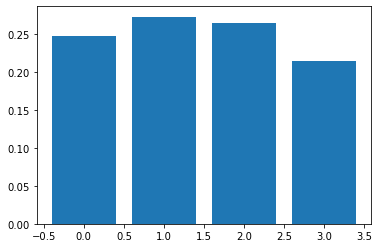

In [27]:
# To get feature importance

from matplotlib import pyplot

importance = BalScaleDT.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [29]:
# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.tree import DecisionTreeClassifier 

BalScaleDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                    max_depth=None, max_features=None, max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                    random_state=None, splitter='best')

BalScaleDT = BalScaleDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = BalScaleDT.predict(x_test)
y_pred_prob = BalScaleDT.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[ 0  4 12]
 [14 75  7]
 [ 4  1 71]]
Print Class: 0
TP=0, FN=0, TN=188, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 1
TP=0, FN=16, TN=154, FP=18
Accuracy: 0.819
Precision: 0.0
Sensitivity: 0.0
F1-Score: 0.0
Specificity: 0.895
Balanced Accuracy: 0.448
MCC: -0.099

Print Class: 2
TP=75, FN=21, TN=87, FP=5
Accuracy: 0.862
Precision: 0.938
Sensitivity: 0.781
F1-Score: 0.852
Specificity: 0.946
Balanced Accuracy: 0.863
MCC: 0.735



In [30]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean() 

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 89.3667%
Precision: nan%
Recall or Sensitivity: nan%
F1-Score: nan
Specificity or True Nagative Rate: 94.7%
Balanced Accuracy: nan%

MCC: nan



In [31]:
# Merge two Dataframes on index of both the dataframes

Results = pd.DataFrame({'Class_Name':y_test, 'Pred_Class_Name':y_pred})
ResultsFinal = x_test.merge(Results, left_index=True, right_index=True)
ResultsFinal.head()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance,Class_Name,Pred_Class_Name
447,4,3,5,3,3,1
485,4,5,3,1,2,2
215,2,4,4,1,2,2
212,2,4,3,3,3,3
480,4,5,2,1,2,2


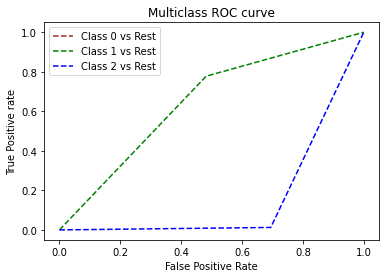

In [32]:
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=600);  

In [33]:
# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted'),3))

roc_auc_score: 0.723


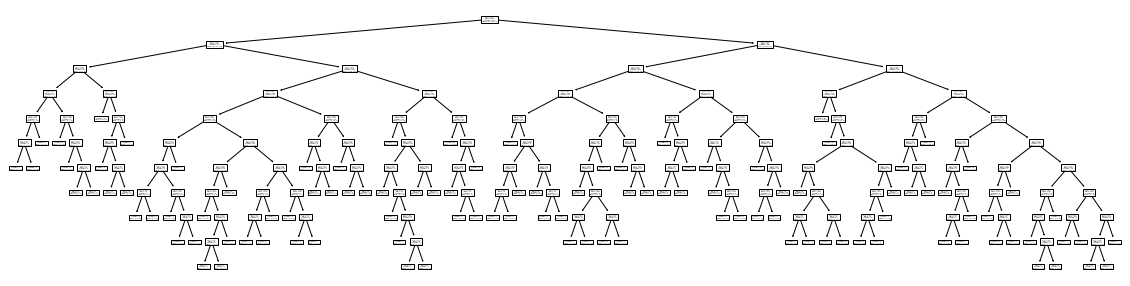

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,5))
tree.plot_tree(BalScaleDT);